# Before PCA
- PCA를 하기 이전의 결과에 대해서 다룬다.
- PCA를 하기 이전에는 결과가 좋지 않다는 것을 알 수 있다.
- 모든 AutoEncoder의 Output이 비슷하게 나오므로, 임계값을 설정하기 모호하다.
- 결과적으로 Error를 잘 맞추지 못한다.

### 환경설정

In [1]:
### Package Loading
%cd C:\PumpSensor
import Data
import Modeling
import torch.nn as nn
import torch

### FIX SEED
Modeling.set_seeds(1337)

c:\PumpSensor


### 데이터 로딩

In [2]:
data, test, answer,origin, data_with_time = Data.DataPreprocessing("C:\PumpSensor\[Kaggle] 펌프 센서 데이터\sensor.csv",scaler = False)
data = torch.Tensor(np.array(data))
test = torch.Tensor(np.array(test))

### 모델링

In [3]:
### 모델 정의
model = Modeling.AutoEncoder(input_size = 51, hidden_size = 30, output_size = 20)

In [4]:
### 학습
model = Modeling.training(model, data, loss_functions = nn.MSELoss(), learning_rate = 0.01, batch_sizes = 64, epochs = 30)

epoch: 1   loss: 3183839.9888916016
epoch: 2   loss: 349365.1079711914
epoch: 3   loss: 277832.8747253418
epoch: 4   loss: 253132.31045913696
epoch: 5   loss: 235255.02724075317
epoch: 6   loss: 225961.0263710022
epoch: 7   loss: 216391.45246505737
epoch: 8   loss: 207652.36781692505
epoch: 9   loss: 199291.9620666504
epoch: 10   loss: 200827.1650314331
epoch: 11   loss: 198163.0693359375
epoch: 12   loss: 241186.87241744995
epoch: 13   loss: 185774.52222824097
epoch: 14   loss: 196910.05809402466
epoch: 15   loss: 182886.9337387085
epoch: 16   loss: 188343.41513824463
epoch: 17   loss: 193459.59562683105
epoch: 18   loss: 190302.3296699524
epoch: 19   loss: 177367.88291549683
epoch: 20   loss: 183831.29300308228
epoch: 21   loss: 179247.46223449707
epoch: 22   loss: 176912.07731246948
epoch: 23   loss: 177699.47156524658
epoch: 24   loss: 178592.44889068604
epoch: 25   loss: 185854.18857955933
epoch: 26   loss: 170579.58946609497
epoch: 27   loss: 176626.99795532227
epoch: 28   loss: 

### 임계값 정의 및 결과

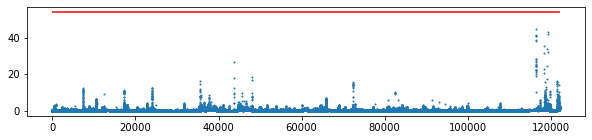

In [7]:
Modeling.Threshold(data, model, nn.MSELoss(),54)

Cutting Test Data Plot by Threshold


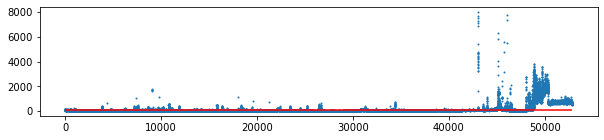


Prediction Result
error :  0
real_error:  4152
Threshold :  54

Confusion Matrix

Acutal True Predict Percentage :  0.6662493586454592
Acutal False Predict Percentage :  1.0


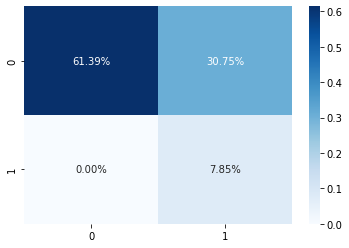

In [8]:
Modeling.Testing(test,model, nn.MSELoss(),54,answer)